In [1]:
import sys
sys.path.append('/Users/supreeth/fastai/')

In [2]:
import warnings
warnings.filterwarnings('ignore')

%reload_ext autoreload
%autoreload 2
%matplotlib inline

# This file contains all the main external libs we'll use
from fastai.imports import *
from fastai.transforms import *
from fastai.plots import *
from fastai.dataset import *

from pathlib import Path

plt.style.use('dark_background')

In [3]:
PATH = Path('../data/')

In [4]:
f = 'dog.4391.jpg'

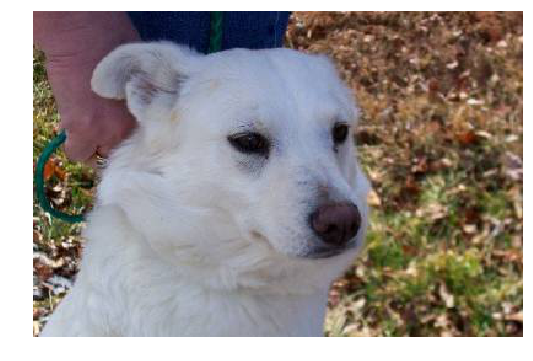

In [5]:
img = open_image(PATH/f)
plots([img])

Original image dimensions: (266, 399, 3)
Transformed image dimensions: (226, 339, 3)


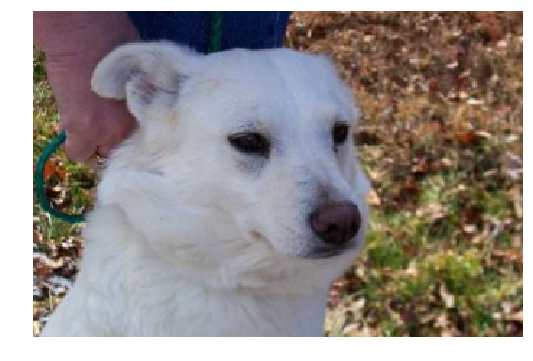

In [6]:
x, _ = RandomScale(sz=224, max_zoom=1.1, p=1.0, tfm_y=TfmType.NO)(img, None)
print(f"Original image dimensions: {img.shape}\nTransformed image dimensions: {x.shape}")
plots([x])

Original image dimensions: (266, 399, 3)
Transformed image dimensions: (224, 224, 3)


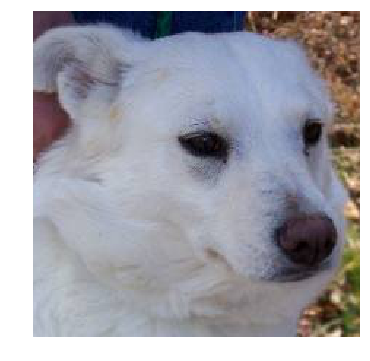

In [7]:
x, _ = RandomCrop(targ_sz=224, tfm_y=TfmType.NO)(img, None)
print(f"Original image dimensions: {img.shape}\nTransformed image dimensions: {x.shape}")
plots([x])

Original image dimensions: (266, 399, 3)
Transformed image dimensions: (224, 224, 3)


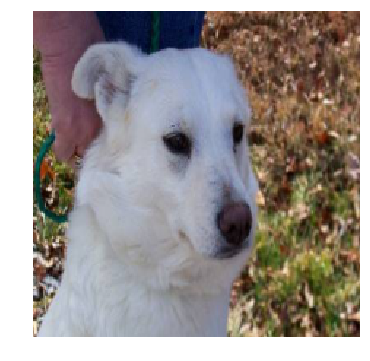

In [8]:
x, _ = NoCrop(sz=224, tfm_y=TfmType.NO)(img, None)
print(f"Original image dimensions: {img.shape}\nTransformed image dimensions: {x.shape}")
plots([x])

Original image dimensions: (266, 399, 3)
Transformed image dimensions: (224, 224, 3)


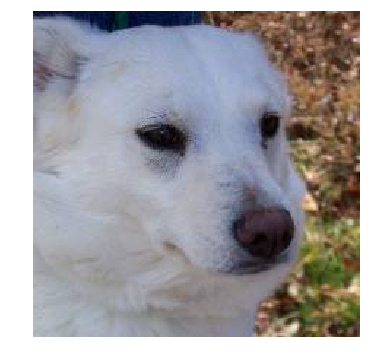

In [9]:
x, _ = CenterCrop(sz=224, tfm_y=TfmType.NO)(img, None)
print(f"Original image dimensions: {img.shape}\nTransformed image dimensions: {x.shape}")
plots([x])

Original image dimensions: (266, 399, 3)
Transformed image dimensions: (399, 266, 3)


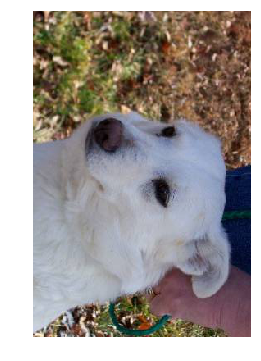

In [10]:
x, _ = RandomDihedral(tfm_y=TfmType.NO)(img, None)
print(f"Original image dimensions: {img.shape}\nTransformed image dimensions: {x.shape}")
plots([x])

Original image dimensions: (266, 399, 3)
Transformed image dimensions: (266, 399, 3)


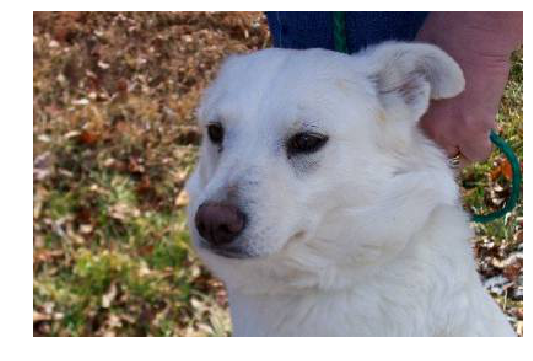

In [11]:
x, _ = RandomFlip(tfm_y=TfmType.NO, p=1.0)(img, None)
print(f"Original image dimensions: {img.shape}\nTransformed image dimensions: {x.shape}")
plots([x])

Original image dimensions: (266, 399, 3)
Transformed image dimensions: (266, 399, 3)


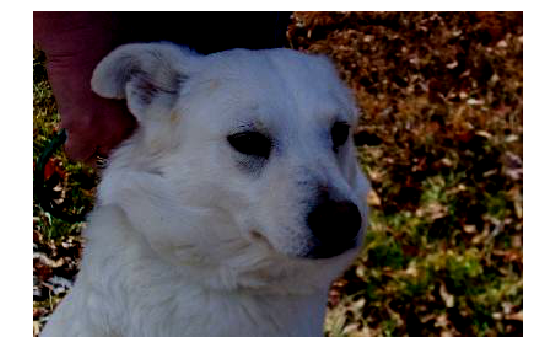

In [12]:
x, _ = RandomLighting(0.7, 0.7)(img, None)
print(f"Original image dimensions: {img.shape}\nTransformed image dimensions: {x.shape}")
plots([x])

Original image dimensions: (266, 399, 3)
Transformed image dimensions: (266, 399, 3)


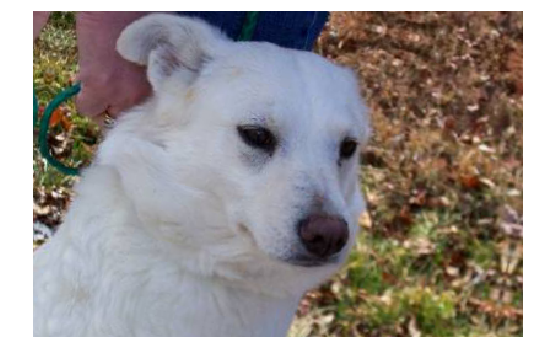

In [13]:
x, _ = RandomRotate(deg=45, p=1.0, mode=2, tfm_y=TfmType.NO)(img, None)
print(f"Original image dimensions: {img.shape}\nTransformed image dimensions: {x.shape}")
plots([x])

In [14]:
def googlenet_resize(im, targ, min_area_frac, min_aspect_ratio, max_aspect_ratio, flip):
    h,w,*_ = im.shape
    area = h*w
    for _ in range(10):
        targetArea = random.uniform(min_area_frac, 1.0) * area
        aspectR = random.uniform(min_aspect_ratio, max_aspect_ratio)
        ww = int(np.sqrt(targetArea * aspectR) + 0.5)
        hh = int(np.sqrt(targetArea / aspectR) + 0.5)
        if flip:
            ww, hh = hh, ww
        if hh <= h and ww <= w:
            x1 = 0 if w == ww else random.randint(0, w - ww)
            y1 = 0 if h == hh else random.randint(0, h - hh)
            out = im[y1:y1 + hh, x1:x1 + ww]
            out = cv2.resize(out, (targ, targ), interpolation=cv2.INTER_CUBIC)
            return out
    out = scale_min(im, targ, interpolation=cv2.INTER_CUBIC)
    out = center_crop(out)
    return out

In [15]:
class RandomGoogleNetResize(CoordTransform):
    
    def __init__(self, targ_sz, min_area_frac=0.08, min_aspect_ratio=0.75, max_aspect_ratio=1.33, p=0.5, tfm_y=TfmType.NO, sz_y=None, seed=42):
        super().__init__(tfm_y)
        self.targ_sz, self.min_area_frac, self.min_aspect_ratio, self.max_aspect_ratio, self.p, self.sz_y, self.seed = targ_sz, min_area_frac, min_aspect_ratio, max_aspect_ratio, p, sz_y, seed
    
    def set_state(self):
        if self.seed: random.seed(self.seed)
        self.store.fp = random.random()<self.p

    def do_transform(self, x, is_y):
        sz = self.sz_y if is_y else self.targ_sz
        return googlenet_resize(x, sz, self.min_area_frac, self.min_aspect_ratio, self.max_aspect_ratio, self.store.fp)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


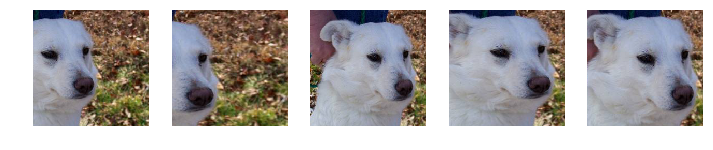

In [16]:
resized = []
for _ in range(5):
    x, _ = RandomGoogleNetResize(targ_sz=224, tfm_y=TfmType.NO, seed=None)(img, None)
    resized.append(x)
plots(resized)